In [1]:
from os import getcwd
from os.path import join
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_excel(join(getcwd(), '/Users/apple/Desktop/Intent_classification_filtered_1.xlsx'))



print(df.shape)
ax = df['Intents'].value_counts().plot(kind='bar',
                                    figsize=(12,8),
                                    title="Total Number of Intents")
ax.set_xlabel("Intents")
ax.set_ylabel("Frequency")
ax.plot()

train, test = train_test_split(df, test_size=0.1, random_state=500, shuffle=True)

(174, 7)


[]

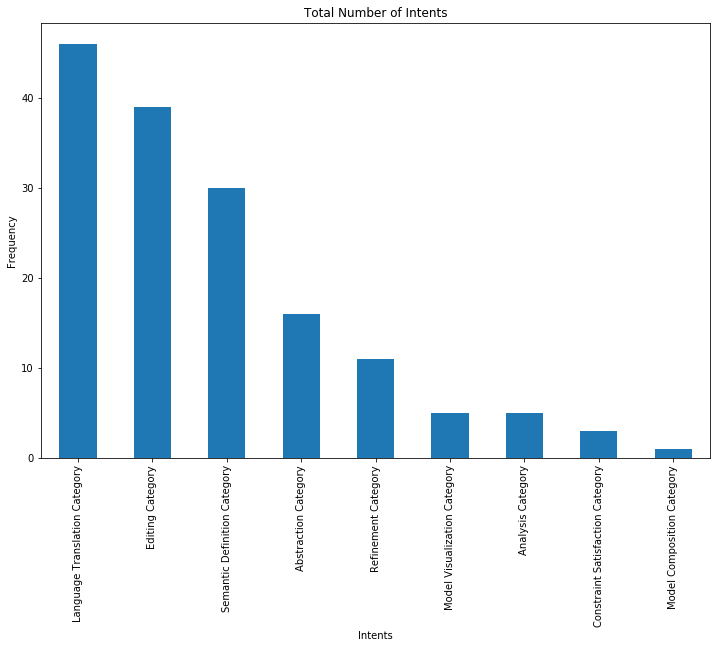

In [2]:
#Plot of total Number of files according to Intents
ax = train['Intents'].value_counts().plot(kind='bar',
                                    figsize=(12,8),
                                    title="Total Number of Intents")
ax.set_xlabel("Intents")
ax.set_ylabel("Frequency")
ax.plot()

[]

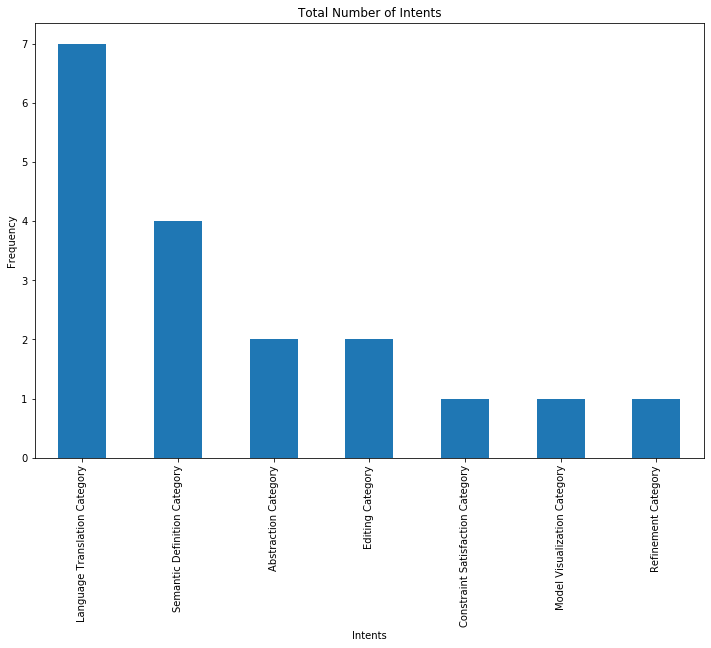

In [3]:
#Plot of Number of files according to Intents for testing
ax = test['Intents'].value_counts().plot(kind='bar',
                                    figsize=(12,8),
                                    title="Total Number of Intents")
ax.set_xlabel("Intents")
ax.set_ylabel("Frequency")
ax.plot()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train.stemmed_content)
X_train_counts.shape

(156, 1930)

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(156, 1930)

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [7]:
def perceptron(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),("perc", Perceptron(max_iter=1000))])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI) , predicted, precision, recall

In [8]:
def multinomialNB(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    print(recall)
    return np.mean(predicted == testI), predicted, precision, recall

    

In [9]:
def passiveAggressiveClassifier(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),("passive_agg", PassiveAggressiveClassifier(max_iter=1000))])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [10]:
def logisticRegression(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),("log_reg", LogisticRegression(max_iter=1000))])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [11]:
def sGDClassifier(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=1000, random_state=42)),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [12]:
def decisionTreeClassifier(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-tree', DecisionTreeClassifier()),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [13]:
def mLPClassifier(trainC,trainI,testC,testI):
    text_clf = text_clf_mlp = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
                          ('clf-mlp', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1,max_iter=1000)),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [14]:
def randomForestClassifier(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-rf', RandomForestClassifier(max_depth=10, random_state=0)),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted, precision, recall

In [15]:
def kNeighborsClassifier(trainC,trainI,testC,testI):
    text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', KNeighborsClassifier(n_neighbors=1)),])
    text_clf = text_clf.fit(trainC, trainI)
    predicted = text_clf.predict(testC)
    precision = precision_score(testI, predicted,pos_label='positive',average='weighted')
    recall = recall_score(testI, predicted,average='weighted')
    return np.mean(predicted == testI), predicted,precision, recall

In [16]:
def applyON(feature,target):
    accMul,preMul,precMul,recMul = multinomialNB(train[feature],train[target],test[feature],test[target])
    accPrec,prePrec,precperc,recperc = perceptron(train[feature],train[target],test[feature],test[target])
    accPass,prePass,precPass,recPass =  passiveAggressiveClassifier(train[feature],train[target],test[feature],test[target])
    accLog,preLog, precLog,recLog =  logisticRegression(train[feature],train[target],test[feature],test[target])
    accSGD,preSGD,precSGD,recSGD =  sGDClassifier(train[feature],train[target],test[feature],test[target])
    accDT,preDT,precDT,recDT =  decisionTreeClassifier(train[feature],train[target],test[feature],test[target])
    accMLP,preMLP,precMLP,recMLP =  mLPClassifier(train[feature],train[target],test[feature],test[target])
    accRF,preRF,precRF,recRF =  randomForestClassifier(train[feature],train[target],test[feature],test[target])
    accKNN,preKNN, precKNN,recKNN=  kNeighborsClassifier(train[feature],train[target],test[feature],test[target])
    
    global output_dict
    output_dict = [{'MultinomialNB':accMul,'Perceptron':accPrec,'PassiveAggressiveClassifier':accPass,'LogisticRegression':accLog,'SGDClassifier':accSGD,'DecisionTreeClassifier':accDT,'MLPClassifier':accMLP,'RandomForestClassifier':accRF,'KNeighborsClassifier':accKNN},
                {'MultinomialNB':preMul,'Perceptron':prePrec,'PassiveAggressiveClassifier':prePass,'LogisticRegression':preLog,'SGDClassifier':preSGD,'DecisionTreeClassifier':preDT,'MLPClassifier':preMLP,'RandomForestClassifier':preRF,'KNeighborsClassifier':preKNN}, 
                {'MultinomialNB':precMul,'Perceptron':precperc,'PassiveAggressiveClassifier':precPass,'LogisticRegression':precLog,'SGDClassifier':precSGD,'DecisionTreeClassifier':precDT,'MLPClassifier':precMLP,'RandomForestClassifier':precRF,'KNeighborsClassifier':precKNN},
                {'MultinomialNB':recMul,'Perceptron':recperc,'PassiveAggressiveClassifier':recPass,'LogisticRegression':recLog,'SGDClassifier':recSGD,'DecisionTreeClassifier':recDT,'MLPClassifier':recMLP,'RandomForestClassifier':recRF,'KNeighborsClassifier':recKNN}]
 
    return output_dict

In [17]:
X,Y,Z,A = applyON('Content','Intents')
print(X)
print(Z)
print(A)

for key,key_1 in zip(Z.values(),A.values()):
        print(2 * key * key_1/(key + key_1))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
0.4444444444444444
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0

In [18]:
X,Y, Z, A = applyON('stop_words_filtered','Intents')
print(X)
print(Z)
print(A)

for key,key_1 in zip(Z.values(),A.values()):
        print(2 * key * key_1/(key + key_1))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

In [19]:

X,Y,Z, A = applyON('stemmed_content','Intents')
print(X)
print(Z)
print(A)

for key,key_1 in zip(Z.values(),A.values()):
        print(2 * key * key_1/(key + key_1))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

In [20]:
from sklearn.linear_model import PassiveAggressiveClassifier
import numpy as np
#clf = MultinomialNB().fit(X_train_tfidf, train.Intent)

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),('tfidf', TfidfTransformer()),("passive_agg", PassiveAggressiveClassifier(max_iter=1000))])
text_clf = text_clf.fit(train.stemmed_content, train.Intents)
predicted = text_clf.predict(test.stemmed_content)
np.mean(predicted == test.Intents)

0.5

In [21]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import roc_curve
#clf = MultinomialNB().fit(X_train_tfidf, train.Intent)

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),('tfidf', TfidfTransformer()),("log_reg", LogisticRegression(max_iter=1000))])
text_clf = text_clf.fit(train.stemmed_content, train.Intents)

predicted = text_clf.predict(test.stemmed_content)
np.mean(predicted == test.Intents)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5555555555555556

In [22]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=1000, random_state=42)),])
_ = text_clf_svm.fit(train.stemmed_content, train.Intents)
predicted_svm = text_clf_svm.predict(test.stemmed_content)
np.mean(predicted_svm == test.Intents)

0.5

In [23]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(test.Intents, predicted_svm, labels=df.Intents.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=df.Intents.unique())
disp.plot() 

NameError: name 'ConfusionMatrixDisplay' is not defined

In [138]:
from sklearn.metrics import confusion_matrix#



cm = confusion_matrix(test.Intents, predicted_svm, labels=text_clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=text_clf_svm.classes_)
disp.plot() 

In [139]:
from sklearn.tree import DecisionTreeClassifier

text_clf_tree = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-tree', DecisionTreeClassifier()),])
_ = text_clf_tree.fit(train.stemmed_content, train.Intents)
predicted_tree = text_clf_tree.predict(test.stemmed_content)
np.mean(predicted_tree == test.Intents)

0.38461538461538464

In [140]:
from sklearn.neural_network import MLPClassifier

text_clf_mlp = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
                          ('clf-mlp', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1,max_iter=1000)),])

_ = text_clf_mlp.fit(train.stemmed_content, train.Intents)
predicted_mlp = text_clf_mlp.predict(test.stemmed_content)
np.mean(predicted_mlp == test.Intents)

0.8461538461538461

In [141]:
from sklearn.ensemble import RandomForestClassifier
text_clf_rf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
('clf-rf', RandomForestClassifier(max_depth=10, random_state=0)),])

_ = text_clf_rf.fit(train.stemmed_content, train.Intents)
predicted_rf = text_clf_rf.predict(test.stemmed_content)
np.mean(predicted_rf == test.Intents)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5384615384615384

In [142]:
from sklearn.neighbors import KNeighborsClassifier
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', KNeighborsClassifier(n_neighbors=1)),])
text_clf = text_clf.fit(train.stemmed_content, train.Intents)
predicted = text_clf.predict(test.stemmed_content)
np.mean(predicted == test.Intents)

0.6153846153846154